In [1]:
%matplotlib inline

In [2]:
from scipy.integrate import simps, trapz, cumtrapz
import pandas as pd
import numpy as np
import pylab as plt

In [3]:
data = pd.read_csv("../data_source/income_GDP_data.csv")
data.set_index(['year', 'code'], inplace=True)
numerical_variables = data.keys().tolist()
origins = np.array([item.split('_')[-1] for item in numerical_variables])
sources = set(origins)
origins = {source: np.array(numerical_variables)[origins==source] for source in sources}

In [34]:
data[origins['WID']].info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 14746 entries, (1994.0, ABW) to (2014.0, ZWE)
Data columns (total 8 columns):
D1_WID                       443 non-null float64
V1_WID                       443 non-null float64
P1_WID                       448 non-null float64
top_0.5_income_share_WID     449 non-null float64
Pr1_WID                      449 non-null float64
top_0.05_income_share_WID    201 non-null float64
top_0.01_income_share_WID    449 non-null float64
national_income_WID          1875 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


In [35]:
test = data[origins['WID']].dropna(how="all").loc[2010].loc['JPN']
test

D1_WID                           41.57
V1_WID                           27.02
P1_WID                           10.44
top_0.5_income_share_WID          7.17
Pr1_WID                           3.15
top_0.05_income_share_WID         2.23
top_0.01_income_share_WID         1.03
national_income_WID          390223.40
Name: JPN, dtype: float64

In [36]:
share_dict = {"D1_WID": 0.1, "V1_WID": 0.05, "P1_WID": 0.01, "top_0.5_income_share_WID": 0.005, 
              "Pr1_WID": 0.001, "top_0.05_income_share_WID": 0.0005, "top_0.01_income_share_WID": 0.0001}

In [37]:
lorentz = pd.DataFrame({"x-%_poorest": (1 - np.array(share_dict.values())), 
                        "share": [100 - test[var_name] for var_name in share_dict.keys()]})
lorentz.loc[len(lorentz) + 1] = {"share": 0, "x-%_poorest": 0}
lorentz.loc[len(lorentz) + 1] = {"share": 100, "x-%_poorest": 1}
lorentz = lorentz.sort("x-%_poorest")
lorentz

,share,x-%_poorest
8,0.00,0.0000
4,58.43,0.9000
5,72.98,0.9500
0,89.56,0.9900
3,92.83,0.9950
2,96.85,0.9990
1,97.77,0.9995
6,98.97,0.9999
9,100.00,1.0000


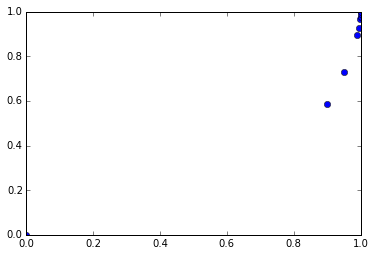

In [38]:
plt.plot(lorentz["x-%_poorest"].values, lorentz["share"].values / 100., 'o')

In [39]:
G = 1 - 2 * trapz(lorentz["share"].values / 100., lorentz["x-%_poorest"].values)
print("G = ", G)

('G = ', 0.32474327000000003)


# Computation of the Gini coefficient from WID

In [40]:
data['gini_trapz'] = float('nan')
data['gini_simps'] = float('nan')
for row in data[share_dict.keys()].dropna(how="all").iterrows():
    actual_share_list = list(set(row[1].keys().values) & set(share_dict.keys()))
    actual_share_dict = dict((k, share_dict[k]) for k in actual_share_list)
    lorentz = pd.DataFrame({"x-%_poorest": (1 - np.array(actual_share_dict.values())), 
                        "share": [100 - row[1][var_name] for var_name in actual_share_dict.keys()]})
    lorentz.loc[len(lorentz) + 1] = {"share": 0, "x-%_poorest": 0}
    lorentz.loc[len(lorentz) + 1] = {"share": 100, "x-%_poorest": 1}
    lorentz = lorentz.sort("x-%_poorest")
    G_trapz = 1 - 2 * trapz(lorentz["share"].values / 100., lorentz["x-%_poorest"].values)
    G_simps = 1 - 2 * simps(lorentz["share"].values / 100., lorentz["x-%_poorest"].values)
    # data["gini_extra"][row[0][0]][row[0][1]] = G
    data.set_value((row[0][0], row[0][1]), 'gini_trapz', G_trapz)
    data.set_value((row[0][0], row[0][1]), 'gini_simps', G_simps)

In [41]:
row[1].keys()

Index([u'P1_WID', u'top_0.05_income_share_WID', u'Pr1_WID', u'top_0.5_income_share_WID', u'D1_WID', u'V1_WID', u'top_0.01_income_share_WID'], dtype='object')

In [42]:
data.query("code == 'JPN'")

,,gini_DS,Q4_DS,Q3_DS,Q2_DS,Q1_DS,D1_WB,D9_WB,QU1_WB,QU2_WB,QU3_WB,...,P1_WID,top_0.5_income_share_WID,Pr1_WID,top_0.05_income_share_WID,top_0.01_income_share_WID,national_income_WID,GDP_PWT,GDP_PC_PWT,gini_trapz,gini_simps
year,code,,,,,,,,,,,,,,,,,,,,,
1886,JPN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1887,JPN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1888,JPN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1889,JPN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1890,JPN,31.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1891,JPN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1892,JPN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1893,JPN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1894,JPN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
data.query("year == " + str(row[0][0])).query("code == '" + str(row[0][1]) + "'")['gini_extra']

KeyError: 'gini_extra'

In [ ]:
data.index.lexsort_depth

# Compute gini from worldbank

In [4]:
share_dict_WB = {'D1_WB': 0.1, 'cum_QU1_WB': 0.2, 'cum_QU2_WB': 0.4,
                'cum_QU3_WB': 0.6, 'cum_QU4_WB': 0.8, 'cum_QU5_WB': 1}

In [7]:
data[share_dict_WB.keys()].dropna(how='any').info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1415 entries, (2000.0, AGO) to (2010.0, ZMB)
Data columns (total 6 columns):
cum_QU2_WB    1415 non-null float64
D1_WB         1415 non-null float64
cum_QU1_WB    1415 non-null float64
cum_QU5_WB    1415 non-null float64
cum_QU4_WB    1415 non-null float64
cum_QU3_WB    1415 non-null float64
dtypes: float64(6)
memory usage: 77.4 KB


In [6]:
for i in range(1, 6):
    data["cum_QU" + str(i) + "_WB"] = sum(data["QU" + str(k) + "_WB"] for k in range(1, i + 1))

In [14]:
data[~data["cum_QU1_WB"].isnull()]

,,gini_DS,Q4_DS,Q3_DS,Q2_DS,Q1_DS,D1_WB,D9_WB,QU1_WB,QU2_WB,QU3_WB,...,national_income_WID,GDP_PWT,GDP_PC_PWT,cum_QU1_WB,cum_QU2_WB,cum_QU3_WB,cum_QU4_WB,cum_QU5_WB,gini_trapz,gini_simps
year,code,,,,,,,,,,,,,,,,,,,,,
2000,AGO,NaN,NaN,NaN,NaN,NaN,40.25,0.98,56.12,20.16,12.71,...,NaN,32284.107422,2318.199248,56.12,76.28,88.99,96.83,100.01,0.65701,NaN
2008,AGO,NaN,NaN,NaN,NaN,NaN,32.31,2.07,48.54,21.94,14.46,...,NaN,87251.804688,4837.120458,48.54,70.48,84.94,94.56,99.99,0.57785,NaN
1996,ALB,NaN,NaN,NaN,NaN,NaN,21.22,3.86,36.12,23.29,17.73,...,NaN,12948.540039,4160.043860,36.12,59.41,77.14,90.84,99.99,0.43914,NaN
2002,ALB,NaN,NaN,NaN,NaN,NaN,26.04,3.42,40.92,22.10,16.38,...,NaN,14331.560547,4638.378727,40.92,63.02,79.40,91.81,100.00,0.48572,NaN
2005,ALB,NaN,NaN,NaN,NaN,NaN,24.34,3.48,39.17,22.50,17.03,...,NaN,16960.060547,5398.198659,39.17,61.67,78.70,91.60,100.00,0.46973,NaN
2008,ALB,NaN,NaN,NaN,NaN,NaN,24.46,3.73,39.00,22.23,16.83,...,NaN,21701.830078,6821.478136,39.00,61.23,78.06,91.13,100.00,0.46314,NaN
2012,ALB,NaN,NaN,NaN,NaN,NaN,22.93,3.66,37.82,22.81,17.34,...,NaN,NaN,NaN,37.82,60.63,77.97,91.14,99.99,0.45535,NaN
1986,ARG,NaN,NaN,NaN,NaN,NaN,32.43,1.95,48.43,21.87,14.79,...,NaN,122900.265625,3988.845849,48.43,70.30,85.09,94.89,100.00,0.57884,NaN
1987,ARG,NaN,NaN,NaN,NaN,NaN,34.42,1.73,50.49,21.50,14.21,...,NaN,131877.281250,4217.400990,50.49,71.99,86.20,95.37,99.98,0.60013,NaN


In [12]:
data['gini_WB'] = float('nan')
for row in data[share_dict_WB.keys()].dropna(how="all").iterrows():
    actual_share_list = row[1][~row[1].isnull()].keys().values
    actual_share_dict = dict((k, share_dict_WB[k]) for k in actual_share_list)
    lorentz = pd.DataFrame({"x-%_poorest": (1 - np.array(actual_share_dict.values())), 
                        "share": [100 - row[1][var_name] for var_name in actual_share_dict.keys()]})
    lorentz.loc[len(lorentz) + 1] = {"share": 0, "x-%_poorest": 0}
    lorentz = lorentz.sort("x-%_poorest")
    G_trapz = 1 - 2 * trapz(lorentz["share"].values / 100., lorentz["x-%_poorest"].values)
    # data["gini_extra"][row[0][0]][row[0][1]] = G
    data.set_value((row[0][0], row[0][1]), 'gini_WB', G_trapz)

In [65]:
data.keys()

Index([u'gini_DS', u'Q4_DS', u'Q3_DS', u'Q2_DS', u'Q1_DS', u'D1_WB', u'D9_WB', u'QU1_WB', u'QU2_WB', u'QU3_WB', u'QU4_WB', u'QU5_WB', u'GDP_MP_WB', u'GDP_growth_WB', u'GDP_PC_WB', u'GDP_OECD', u'GDP_CAP_OECD', u'gini_post_taxe_OECD', u'gini_before_taxe_OECD', u'median_income_OECD', u'palma_OECD', u'P90/P10_OECD', u'P90/P50_OECD', u'P50/P10_OECD', u'S80/S20_OECD', u'S90/S10_OECD', u'country', u'D1_WID', u'V1_WID', u'P1_WID', u'top_0.5_income_share_WID', u'Pr1_WID', u'top_0.05_income_share_WID', u'top_0.01_income_share_WID', u'national_income_WID', u'GDP_PWT', u'GDP_PC_PWT', u'gini_trapz', u'gini_simps', u'cum_QU1', u'cum_QU2', u'cum_QU3', u'cum_QU4', u'cum_QU5', u'cum_QU1_WB', u'cum_QU2_WB', u'cum_QU3_WB', u'cum_QU4_WB', u'cum_QU5_WB'], dtype='object')

In [13]:
lorentz

,share,x-%_poorest
3,0.00,0.0
7,0.00,0.0
4,3.81,0.2
5,10.57,0.4
0,21.06,0.6
2,38.95,0.8
1,54.77,0.9
